# Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

C:\Users\Predator\Envs\kn_ml\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Predator\Envs\kn_ml\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


# Create Simple CNN

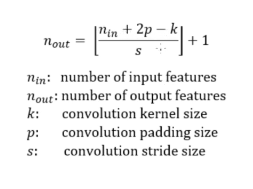

In [3]:
class CNN(nn.Module):
    def __init__(self, input_channel=1, num_classes=10):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8,kernel_size=(3,3), stride=(1,1), padding=(1,1)) #same convolution
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16,kernel_size=(3,3), stride=(1,1), padding=(1,1)) #same convolution
        self.fc1 = nn.Linear(16*7*7, num_classes)
        
    
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x
    
model = CNN()
x = torch.randn(64,1,28,28)

In [4]:
x.shape

torch.Size([64, 1, 28, 28])

In [5]:
model(x).shape

torch.Size([64, 10])

# Set device

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Hyperparameters

In [7]:
in_channel = 1
num_classes = 10
learning_rate = 0.001
batch_size=64
num_epochs=1

# Load Data

In [8]:
train_dataset = datasets.MNIST(root='dataset/', transform = transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='dataset/', transform = transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=True)


# Initialize Network

In [9]:
model = CNN(input).to(device)

# Loss and Optimizer

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train Network

In [11]:
for epoch in range(num_epochs):
    for batch_idx,(data, targets) in enumerate(train_loader):
        #Get data to cuda if possible
        data = data.to(device=device)
        targets = targets.to(device=device)
        
        #forward
        scores = model(data)
        loss = criterion(scores,targets)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        
        #gradient descent or adam step
        optimizer.step()

# Check accuracy on `Training` and `Testing` 

In [15]:
def check_accuracy(loader, model):
    num_correct=0
    num_samples=0
    model.eval()
    
    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device)
            y = y.to(device = device)
            
            scores = model(x)
            _,predictions = scores.max(1)
            num_correct +=(predictions==y).sum()
            num_samples +=predictions.size(0)
        
#         print(f'Got {num_correct} / {num_samples} with accuracy ({float(num_correct)}/{float(num_samples)})*100:.2f' )
        print(f'Got {num_correct} / {num_samples} with accuracy {(float(num_correct)/float(num_samples))*100:.2f}')
    model.train()
    return 

In [16]:
check_accuracy(train_loader, model)

Got 57895 / 60000 with accuracy 96.49


In [17]:
check_accuracy(test_loader, model)

Got 57895 / 60000 with accuracy 96.49
